# Real and Fake News Dataset

Notes* Remember to install:

1. wordcloud package, pip install wordcloud
2. nltk, pip install nltk
3. genism, pip install --upgrade gensim

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Import data

In [28]:
#Import data
fake = pd.read_csv('Fake.csv')
real = pd.read_csv('True.csv')

In [29]:
real.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017

In [30]:
fake.head()

title  \
0   Donald Trump Sends Out Embarrassing New Year’...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obama’s Name...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25, 2017

In [31]:
#Let's check the number of entries there are for each dataset.
print("Real news count: " + str(len(real)))
print("Fake news count: " + str(len(fake)))
print("Total available entries: " + str(len(real) + len(fake)))

Real news count: 21417
Fake news count: 23481
Total available entries: 44898


In [32]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [33]:
real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


# Deleting Duplicate Rows from Fake and Real News dataset

In [34]:
fake.drop_duplicates(subset ="title", keep = 'first', inplace = True) 
fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17903 entries, 0 to 22702
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    17903 non-null  object
 1   text     17903 non-null  object
 2   subject  17903 non-null  object
 3   date     17903 non-null  object
dtypes: object(4)
memory usage: 699.3+ KB


In [35]:
real.drop_duplicates(subset ="title", keep = 'first', inplace = True) 
real.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20826 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    20826 non-null  object
 1   text     20826 non-null  object
 2   subject  20826 non-null  object
 3   date     20826 non-null  object
dtypes: object(4)
memory usage: 813.5+ KB


# Merge datasets

In [36]:
# Merge the datasets
real["target"] = 1
fake["target"] = 0

frame = [real, fake]
df = pd.concat(frame)

df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  
0  December 31, 2017        1  
1  December 29, 2017        1  
2  December 31, 2017        1  
3  December 30, 2017        1  
4  December 29, 2017        1

In [37]:
df.tail()

title  \
22698  The White House and The Theatrics of ‘Gun Cont...   
22699  Activists or Terrorists? How Media Controls an...   
22700  BOILER ROOM – No Surrender, No Retreat, Heads ...   
22701  Federal Showdown Looms in Oregon After BLM Abu...   
22702  A Troubled King: Chicago’s Rahm Emanuel Desper...   

                                                    text  subject  \
22698  21st Century Wire says All the world s a stage...  US_News   
22699    Randy Johnson 21st Century WireThe majority ...  US_News   
22700  Tune in to the Alternate Current Radio Network...  US_News   
22701  21st Century Wire says A new front has just op...  US_News   
22702  21st Century Wire says It s not that far away....  US_News   

                  date  target  
22698  January 7, 2016       0  
22699  January 7, 2016       0  
22700  January 6, 2016       0  
22701  January 4, 2016       0  
22702  January 2, 2016       0

In [38]:
# Check to see if any columns have missing values
df.isnull().sum()

title      0
text       0
subject    0
date       0
target     0
dtype: int64

In [39]:
# Get basic information on concat dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38729 entries, 0 to 22702
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38729 non-null  object
 1   text     38729 non-null  object
 2   subject  38729 non-null  object
 3   date     38729 non-null  object
 4   target   38729 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [40]:
# Run this cell to avoid indexes of previous datasets from overlapping
df.reset_index(inplace = True)
df.drop("index", axis=1, inplace = True)

In [41]:
df.columns

Index(['title', 'text', 'subject', 'date', 'target'], dtype='object')

In [42]:
df.title.unique()

array(['As U.S. budget fight looms, Republicans flip their fiscal script',
       'U.S. military to accept transgender recruits on Monday: Pentagon',
       "Senior U.S. Republican senator: 'Let Mr. Mueller do his job'",
       ...,
       'BOILER ROOM – No Surrender, No Retreat, Heads Will Roll  – EP #38',
       'Federal Showdown Looms in Oregon After BLM Abuse of Local Ranching Family – Bundys Lead Protest',
       'A Troubled King: Chicago’s Rahm Emanuel Desperate to Save His 2020 Presidential Run'],
      dtype=object)

# Add count of number of words in each article's text

In [43]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words))

df['count'] = df['text'].apply(lambda x: avg_word(x))
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  count  
0  December 31, 2017        1   3907  
1  December 29, 2017        1   3453  
2  December 31, 2017        1   2324  
3  December 30, 2017        1   2085  
4  December 29, 2017        1   4341

In [44]:
df.describe()

target         count
count  38729.000000  38729.000000
mean       0.537737   2015.827494
std        0.498580   1616.247411
min        0.000000      0.000000
25%        0.000000   1058.000000
50%        1.000000   1834.000000
75%        1.000000   2554.000000
max        1.000000  43359.000000

# Number of Fake News and Real news

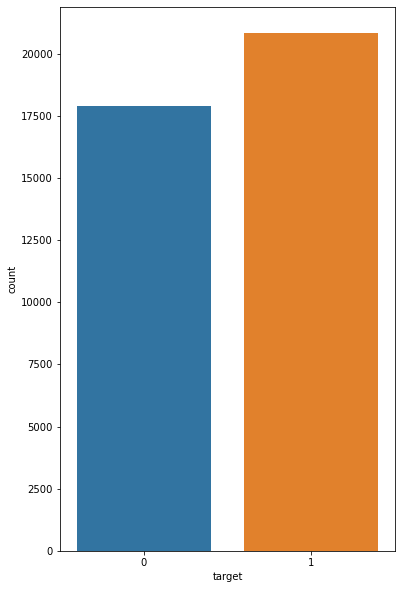

In [45]:
plt.figure(figsize=(6, 10))
sns.countplot(df['target'])

# Overall Distribution of News published by subject

In [46]:
df["subject"].value_counts()

politicsNews       11150
worldnews           9676
News                9049
politics            6834
US_News              783
left-news            705
Government News      532
Name: subject, dtype: int64

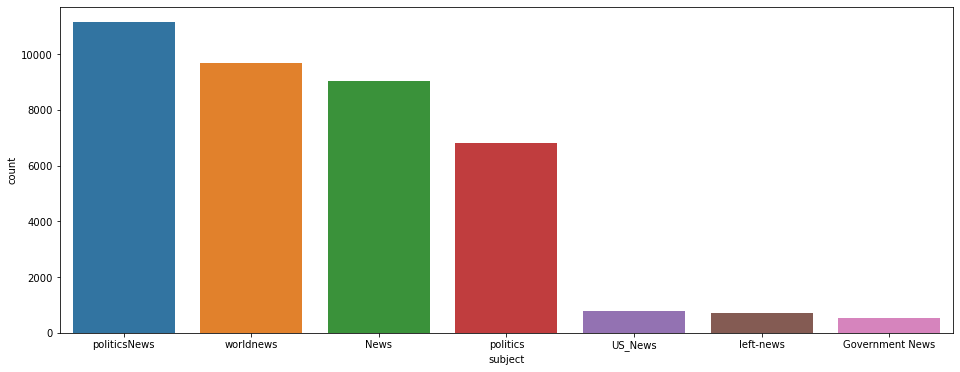

In [47]:
plt.figure(figsize=(16, 6))
sns.countplot(df['subject'], order = df['subject'].value_counts().index)

# Comparison of subjects between fake news and real news

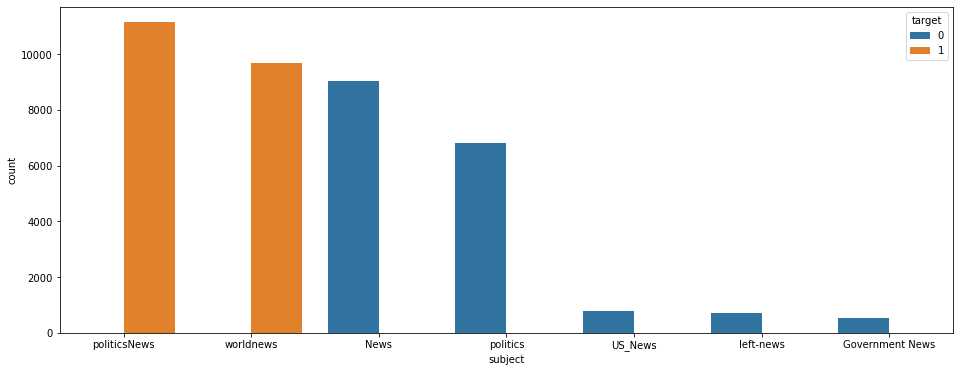

In [48]:
plt.figure(figsize=(16, 6))
sns.countplot(df["subject"], hue=df["target"], order = df['subject'].value_counts().index)

# Filter out dates with http links

In [49]:
df_ = df[df["date"].str.contains("http")]
df_

title  \
30183  https://100percentfedup.com/served-roy-moore-v...   
36326  https://100percentfedup.com/video-hillary-aske...   
36327  https://100percentfedup.com/12-yr-old-black-co...   
36657  https://fedup.wpengine.com/wp-content/uploads/...   
36658  https://fedup.wpengine.com/wp-content/uploads/...   

                                                    text   subject  \
30183  https://100percentfedup.com/served-roy-moore-v...  politics   
36326  https://100percentfedup.com/video-hillary-aske...  politics   
36327  https://100percentfedup.com/12-yr-old-black-co...  politics   
36657  https://fedup.wpengine.com/wp-content/uploads/...  politics   
36658  https://fedup.wpengine.com/wp-content/uploads/...  politics   

                                                    date  target  count  
30183  https://100percentfedup.com/served-roy-moore-v...       0    145  
36326  https://100percentfedup.com/video-hillary-aske...       0     88  
36327  https://100percentfedup.com/12-yr-old-black-co...       0    149  
36657  https://fedup.wpengine.com/wp-content/uploads/...       0     74  
36658  https://fedup.wpengine.com/wp-content/uploads/...       0     66

# Remove rows with wrong data 

In [50]:
df = df[df["date"].apply(lambda x: len(x) < 20)]
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  target  count  
0  December 31, 2017        1   3907  
1  December 29, 2017        1   3453  
2  December 31, 2017        1   2324  
3  December 30, 2017        1   2085  
4  December 29, 2017        1   4341

In [51]:
df["title"].count()

38723

# Convert date variable to numerical

In [52]:
df_ = df.copy()

In [53]:
pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = df['date'].str.contains(pattern)
df=df[filter2]
df['date'] = pd.to_datetime(df['date'])

In [54]:
df_["date"]

0        December 31, 2017 
1        December 29, 2017 
2        December 31, 2017 
3        December 30, 2017 
4        December 29, 2017 
                ...        
38724       January 7, 2016
38725       January 7, 2016
38726       January 6, 2016
38727       January 4, 2016
38728       January 2, 2016
Name: date, Length: 38723, dtype: object

In [55]:
# Transform dates to datetime
# to_period('M) gets datetime to month
df_['date'] = pd.to_datetime(df_['date']).dt.to_period('M')
df_.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject     date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews  2017-12   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews  2017-12   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews  2017-12   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews  2017-12   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews  2017-12   

   target  count  
0       1   3907  
1       1   3453  
2       1   2324  
3       1   2085  
4       1   4341

# Count of articles

In [56]:
# Count of articles by Year
df_["date"].apply(lambda x: (str(x)[:4])).value_counts()

2017    22951
2016    14093
2015     1644
2018       35
Name: date, dtype: int64

In [57]:
# Count by Year-Month
year_month = pd.DataFrame(df_["date"].value_counts()).sort_index()
year_month.reset_index(inplace=True)
year_month["index"] = year_month["index"].astype(str)
year_month

index  date
0   2015-03     6
1   2015-04   160
2   2015-05   209
3   2015-06   144
4   2015-07   196
5   2015-08   180
6   2015-09   156
7   2015-10   205
8   2015-11   192
9   2015-12   196
10  2016-01  1143
11  2016-02  1298
12  2016-03  1378
13  2016-04  1200
14  2016-05  1229
15  2016-06  1112
16  2016-07  1047
17  2016-08   973
18  2016-09  1086
19  2016-10  1151
20  2016-11  1366
21  2016-12  1110
22  2017-01  1548
23  2017-02  1272
24  2017-03  1472
25  2017-04  1119
26  2017-05  1122
27  2017-06  1173
28  2017-07  1094
29  2017-08  1195
30  2017-09  3433
31  2017-10  3480
32  2017-11  3354
33  2017-12  2689
34  2018-02    35

<function matplotlib.pyplot.show(*args, **kw)>

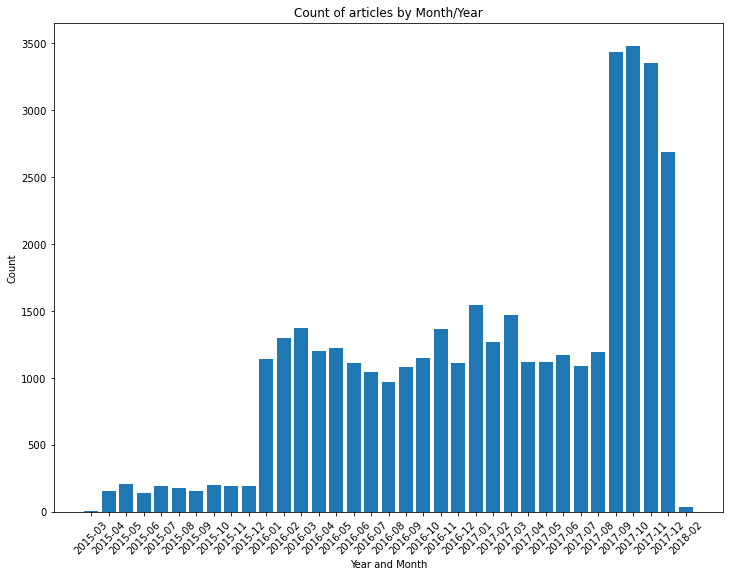

In [58]:
# Count of articles by Month
plt.figure(figsize=(12,9))
plt.bar(year_month["index"], year_month["date"])
plt.xticks(rotation=45)
plt.xlabel("Year and Month")
plt.ylabel("Count")
plt.title("Count of articles by Month/Year")
plt.show

In [59]:
fun = df.copy()
fun.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   target  count  
0       1   3907  
1       1   3453  
2       1   2324  
3       1   2085  
4       1   4341

In [60]:
mask = (fun['date'] >= '2016-01-1') & (df['date'] <= '2018-03-01')
fun1 = fun.loc[mask]
fun1.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   target  count  
0       1   3907  
1       1   3453  
2       1   2324  
3       1   2085  
4       1   4341

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000029DE8C460B8>,
      dtype=object)

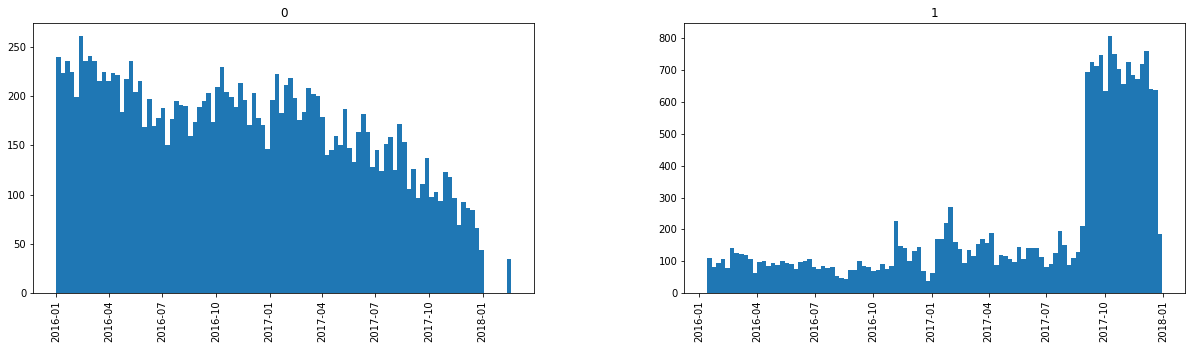

In [33]:
fun1.hist(column='date', by='target', figsize=(20,5), bins=100)

In [34]:
fun1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37079 entries, 0 to 38728
Data columns (total 5 columns):
title      37079 non-null object
text       37079 non-null object
subject    37079 non-null object
date       37079 non-null datetime64[ns]
target     37079 non-null int64
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


# Comparison of Title Length between fake and real news

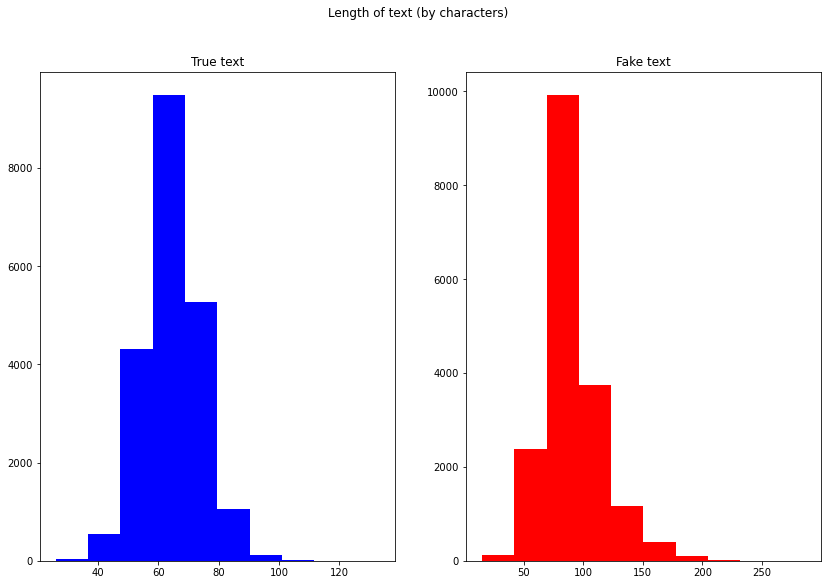

In [61]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,9))

true_length = df[df["target"]==1]["title"].str.len()
ax1.set_title("True text")
ax1.hist(true_length, color="blue")

fake_length = df[df["target"]==0]["title"].str.len()
ax2.set_title("Fake text")
ax2.hist(fake_length, color="red")

fig.suptitle("Length of text (by characters)")
plt.show()

# Comparison of Text Length between fake and real news

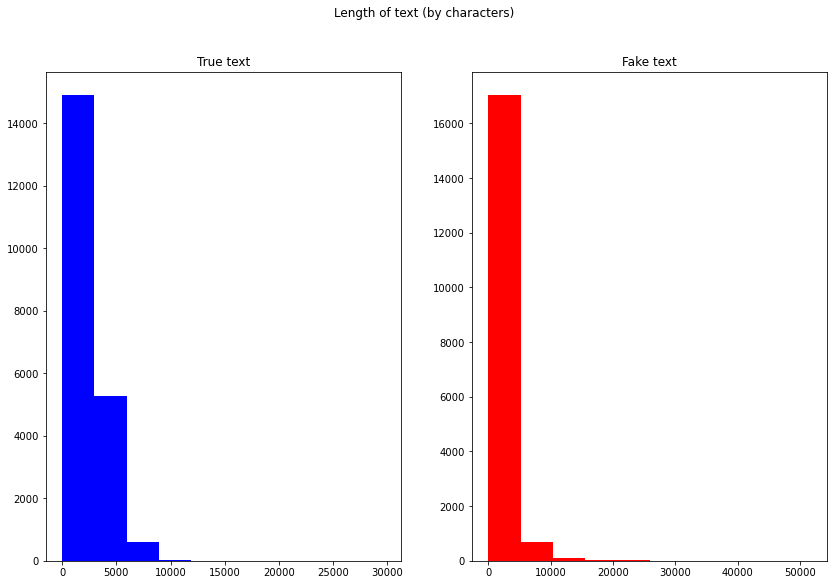

In [62]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,9))

true_length = df[df["target"]==1]["text"].str.len()
ax1.set_title("True text")
ax1.hist(true_length, color="blue")

fake_length = df[df["target"]==0]["text"].str.len()
ax2.set_title("Fake text")
ax2.hist(fake_length, color="red")

fig.suptitle("Length of text (by characters)")
plt.show()

# Comparison of Fake News and Real News by Date

In [63]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews 2017-12-31   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews 2017-12-29   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews 2017-12-31   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews 2017-12-30   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews 2017-12-29   

   target  count  
0       1   3907  
1       1   3453  
2       1   2324  
3       1   2085  
4       1   4341

# Data preparation

# Merge Text and Title Columns

In [64]:
#store original dataframe as df_orig
df_orig = df.copy()

In [65]:
# Merge text & title columns
# Remove title, subject & date.
df['text'] = df['title'] + " " + df['text']

In [66]:
#check for missing rows
df.isna().sum()

title      0
text       0
subject    0
date       0
target     0
count      0
dtype: int64

In [67]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  As U.S. budget fight looms, Republicans flip t...  politicsNews 2017-12-31   
1  U.S. military to accept transgender recruits o...  politicsNews 2017-12-29   
2  Senior U.S. Republican senator: 'Let Mr. Muell...  politicsNews 2017-12-31   
3  FBI Russia probe helped by Australian diplomat...  politicsNews 2017-12-30   
4  Trump wants Postal Service to charge 'much mor...  politicsNews 2017-12-29   

   target  count  
0       1   3907  
1       1   3453  
2       1   2324  
3       1   2085  
4       1   4341

In [68]:
import re
import nltk
nltk.download('stopwords')
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\h-uii\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Clean Data

In [69]:
#remove special characters
def remove_apostrophe_abbrev(text):
    return re.sub('[^\w\s]','', text)

# remove stopwords
def remove_stop_words(text):
    clean_text = []
    for word in text.split():
        if word.strip().lower() not in stop_words:
            clean_text.append(word)
            
    return " ".join(clean_text)

#remove html 
def remove_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#remove links
def remove_links(text):
    return re.sub('https?:\/\/\S+', '', text)

#remove pronouns
def remove_possessive_pronoun(text):
    return re.sub("’s|'s", '', text)

#remove brackets
def remove_between_brackets(text):
    return re.sub('\([^]]*\)', '', text)

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#remove curly braces
def remove_between_curly_brackets(text):
    return re.sub('\{[^]]*\}', '', text)

#remove spaces
def remove_n_space(text):
    return re.sub('\n', '', text)

#convert to lowercase
def convert_lowercase (text):
    return text.lower()

#clean data
def text_cleaner(text):
    text = remove_html_tags(text)
    text = remove_links(text)
    text = remove_possessive_pronoun(text)
    text = remove_apostrophe_abbrev(text)
    text = remove_between_brackets(text)
    text = remove_between_square_brackets(text)
    text = remove_between_curly_brackets(text)
    text = remove_n_space(text)
    text = remove_stop_words(text)
    text = convert_lowercase(text)
    
    return text

In [70]:
df["text"] = df["text"].apply(text_cleaner)

# Lemmatization

In [71]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\h-uii\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\h-uii\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [72]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokenize_text = nltk.word_tokenize(text)
    lemmatize_words = [lemmatizer.lemmatize(word) for word in tokenize_text]
    join_text = ' '.join(lemmatize_words)
    
    return join_text

In [73]:
#store df before lemmetisation
df_beforelem = df.copy()
df["text"] = df["text"].apply(lemmatize_text)
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  u budget fight loom republican flip fiscal scr...  politicsNews 2017-12-31   
1  u military accept transgender recruit monday p...  politicsNews 2017-12-29   
2  senior u republican senator let mr mueller job...  politicsNews 2017-12-31   
3  fbi russia probe helped australian diplomat ti...  politicsNews 2017-12-30   
4  trump want postal service charge much amazon s...  politicsNews 2017-12-29   

   target  count  
0       1   3907  
1       1   3453  
2       1   2324  
3       1   2085  
4       1   4341

# Tokenise Lemmatized Text

In [48]:
tokens_after_lemmatization = df["text"].apply(nltk.word_tokenize)

# Popular words used in Fake News Articles using Word Cloud

In [74]:
from wordcloud import WordCloud, STOPWORDS

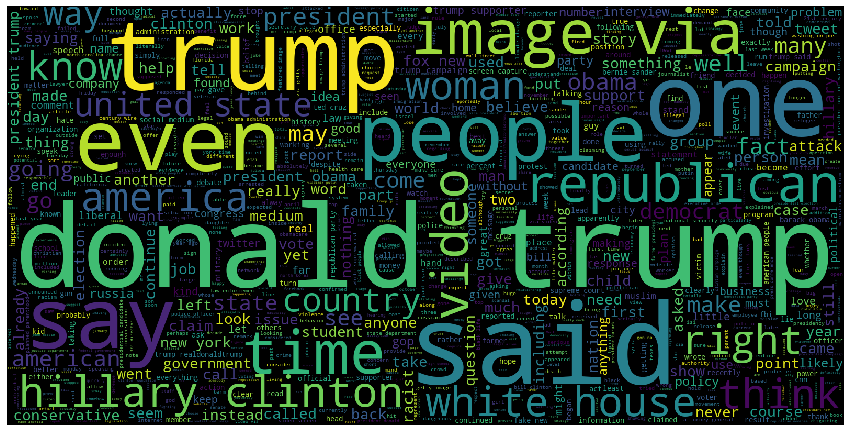

In [50]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df["target"] == 0].text))

plt.axis("off")
plt.imshow(wordcloud)

# Popular words used in Real News Articles using Word Cloud

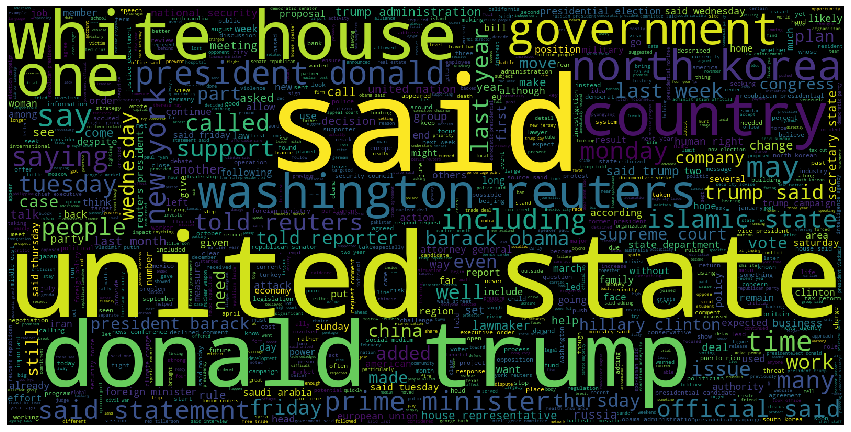

In [51]:
plt.figure(figsize=(15,15))
wordcloud = WordCloud(max_words = 1000 , width = 1600 , 
                      height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df["target"] == 1].text))

plt.axis("off")
plt.imshow(wordcloud)

# Frequency of words used in Fake News

In [75]:
from collections import Counter

In [76]:
#only show top 10
fake_corpus = pd.Series(" ".join(df[df["target"] == 0].text))[0].split()

counter = Counter(fake_corpus)
fake_common = counter.most_common(10)
fake_common = dict(fake_common)
fake_common_df = pd.DataFrame(fake_common.items(), columns = ["words", "count"])
fake_common_df.set_index("words")

count
words            
trump       70972
said        23042
people      21133
president   20348
one         18664
would       18336
state       16287
donald      15530
u           15491
republican  14828

# Frequency of words used in Real News

In [54]:
#only show top 10
true_corpus = pd.Series(" ".join(df[df["target"] == 1].text))[0].split()

counter = Counter(true_corpus)
true_common = counter.most_common(10)
true_common = dict(true_common)
true_common_df = pd.DataFrame(true_common.items(), columns = ["words", "count"])
true_common_df.set_index("words")

count
words            
said        96054
trump       57234
u           42843
state       35750
would       30778
reuters     27618
president   26417
republican  22346
government  19253
year        18451

# Graph of highest frequency words in Fake News

<function matplotlib.pyplot.show(*args, **kw)>

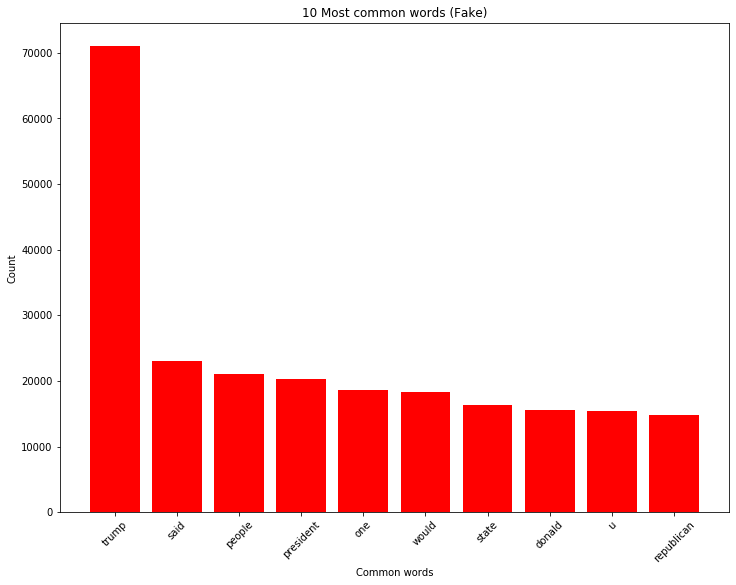

In [55]:
plt.figure(figsize=(12,9))
plt.bar(fake_common.keys(), fake_common.values(), color="red")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (Fake)")
plt.show

# Graph of highest frequency words in Real News

<function matplotlib.pyplot.show(*args, **kw)>

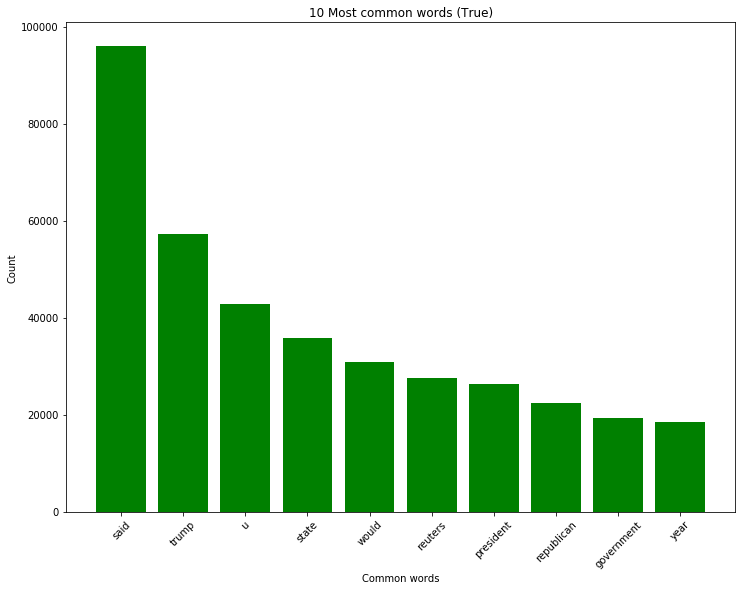

In [56]:
plt.figure(figsize=(12,9))
plt.bar(true_common.keys(), true_common.values(), color="green")
plt.xticks(rotation=45)
plt.xlabel("Common words")
plt.ylabel("Count")
plt.title("10 Most common words (True)")
plt.show

# Common pair words (Bigram) for Fake News 

In [77]:
from nltk.util import ngrams

In [78]:
text = pd.Series(" ".join(df[df["target"] == 0].text))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)

counter = Counter(ngrams(token,2))
most_common = counter.most_common(10)
most_common = dict(most_common)
fake_common_bi = pd.DataFrame(most_common.items(), columns = ["bigram", "count"])
fake_common_bi["bigram"] = fake_common_bi["bigram"].apply(lambda x: " ".join(x))
fake_common_bi

bigram  count
0     donald trump  11992
1        image via   6191
2  hillary clinton   5300
3      white house   5082
4     united state   4623
5  president obama   3380
6         new york   3110
7         fox news   2711
8  president trump   2653
9         donald j   1858

<function matplotlib.pyplot.show(*args, **kw)>

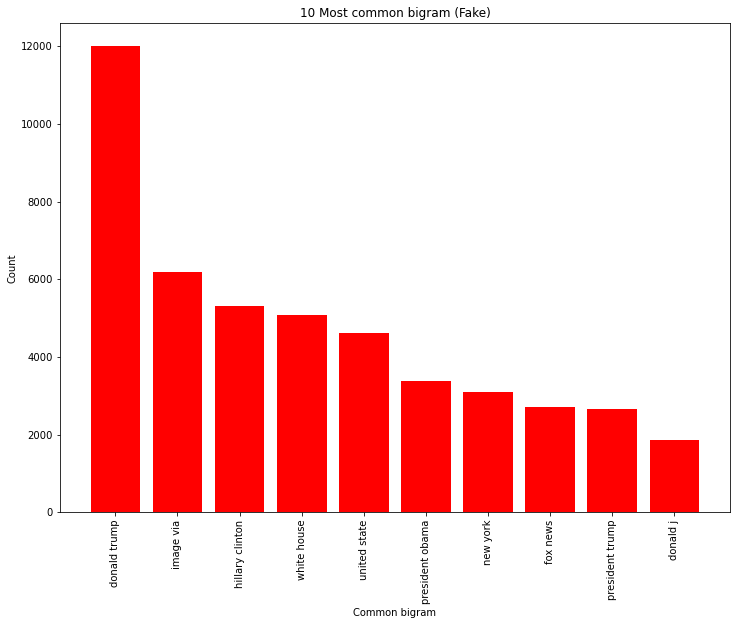

In [79]:
plt.figure(figsize=(12,9))
plt.bar(fake_common_bi["bigram"], fake_common_bi["count"], color="red") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common bigram (Fake)")
plt.show

# Common pair words (Bigram) for Real News 

In [80]:
text = pd.Series(" ".join(df[df["target"] == 1].text))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)

counter = Counter(ngrams(token,2))
most_common = counter.most_common(10)
most_common = dict(most_common)
true_common_bi = pd.DataFrame(most_common.items(), columns = ["bigram", "count"])
true_common_bi["bigram"] = true_common_bi["bigram"].apply(lambda x: " ".join(x))
true_common_bi

bigram  count
0        united state  11531
1        donald trump   9831
2         white house   8866
3  washington reuters   6336
4         north korea   5748
5    president donald   5652
6            new york   4453
7      prime minister   4095
8      said statement   3826
9       islamic state   3544

<function matplotlib.pyplot.show(*args, **kw)>

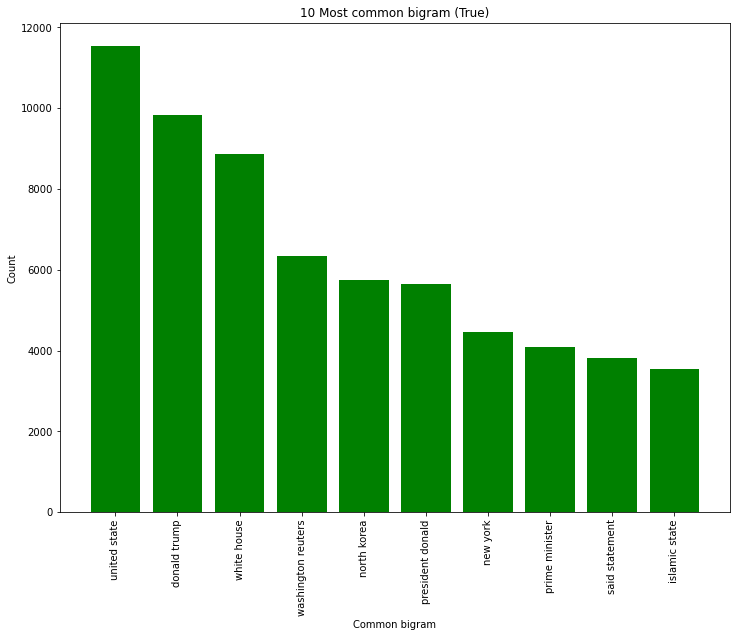

In [81]:
plt.figure(figsize=(12,9))
plt.bar(true_common_bi["bigram"], true_common_bi["count"], color="green") # can do tuples
plt.xticks(rotation=90)
plt.xlabel("Common bigram")
plt.ylabel("Count")
plt.title("10 Most common bigram (True)")
plt.show

# Common three words (Trigram) for Fake News

In [82]:
text = pd.Series(" ".join(df[df["target"] == 0].text))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)

counter = Counter(ngrams(token,3))
most_common = counter.most_common(10)
most_common = dict(most_common)
fake_common_tri = pd.DataFrame(most_common.items(), columns = ["trigram", "count"])
fake_common_tri["trigram"] = fake_common_tri["trigram"].apply(lambda x: " ".join(x))
fake_common_tri

trigram  count
0           donald j trump   1826
1  j trump realdonaldtrump   1524
2            new york time   1102
3        21st century wire    955
4        black life matter    877
5          image via video    787
6   president united state    744
7     video screen capture    728
8         via video screen    667
9       featured image via    619

<function matplotlib.pyplot.show(*args, **kw)>

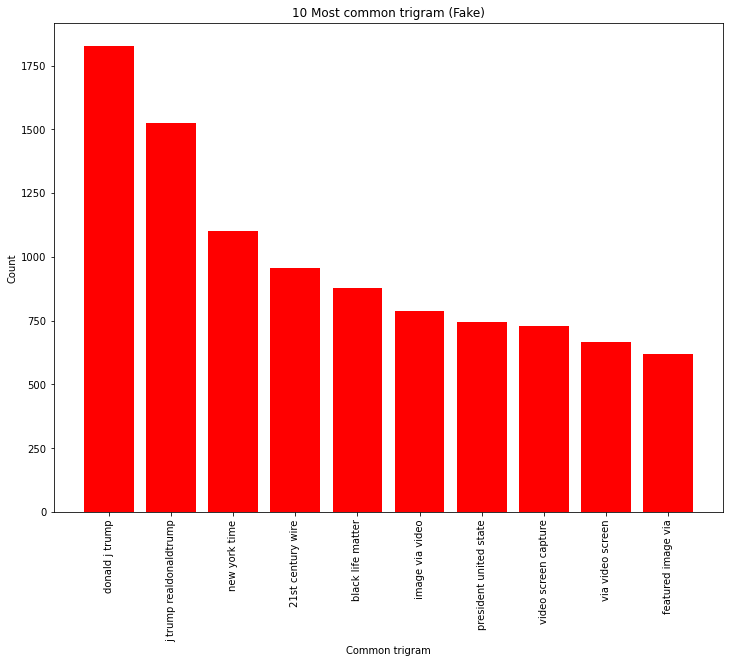

In [85]:
plt.figure(figsize=(12,9))
plt.bar(fake_common_tri["trigram"], fake_common_tri["count"], color="red")
plt.xticks(rotation=90)
plt.xlabel("Common trigram")
plt.ylabel("Count")
plt.title("10 Most common trigram (Fake)")
plt.show

# Common three words (Trigram) for Real News

In [86]:
text = pd.Series(" ".join(df[df["target"] == 1].text))[0]
tokenizer = nltk.RegexpTokenizer(r"\w+")
token = tokenizer.tokenize(text)

counter = Counter(ngrams(token,3))
most_common = counter.most_common(10)
most_common = dict(most_common)
true_common_tri = pd.DataFrame(most_common.items(), columns = ["trigram", "count"])
true_common_tri["trigram"] = true_common_tri["trigram"].apply(lambda x: " ".join(x))
true_common_tri

trigram  count
0       president donald trump   5582
1       president barack obama   2831
2           u president donald   2363
3         washington reuters u   2284
4          reuters u president    948
5             white house said    922
6  presidentelect donald trump    798
7      respond request comment    780
8       u house representative    776
9               nov 8 election    767

<function matplotlib.pyplot.show(*args, **kw)>

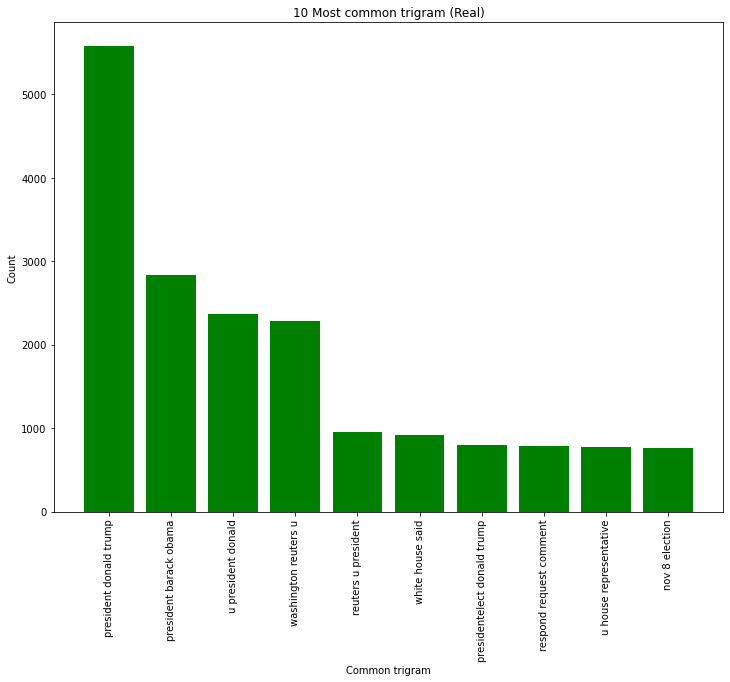

In [87]:
plt.figure(figsize=(12,9))
plt.bar(true_common_tri["trigram"], true_common_tri["count"], color="green")
plt.xticks(rotation=90)
plt.xlabel("Common trigram")
plt.ylabel("Count")
plt.title("10 Most common trigram (Real)")
plt.show

# CountVectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['text'])

In [68]:
print(X)

  (0, 37437)	6
  (0, 75210)	2
  (0, 114589)	1
  (0, 163750)	15
  (0, 76676)	1
  (0, 76008)	4
  (0, 172829)	1
  (0, 208353)	2
  (0, 165131)	1
  (0, 88718)	1
  (0, 50048)	3
  (0, 72752)	1
  (0, 49720)	2
  (0, 206894)	3
  (0, 124925)	1
  (0, 93915)	1
  (0, 71496)	1
  (0, 128302)	2
  (0, 57054)	2
  (0, 141675)	3
  (0, 189675)	8
  (0, 54839)	3
  (0, 39118)	1
  (0, 186760)	2
  (0, 203578)	1
  :	:
  (38722, 205973)	1
  (38722, 85878)	1
  (38722, 55831)	1
  (38722, 204372)	1
  (38722, 95073)	2
  (38722, 115919)	1
  (38722, 93575)	1
  (38722, 135247)	1
  (38722, 63844)	1
  (38722, 184445)	1
  (38722, 156434)	1
  (38722, 173583)	1
  (38722, 33573)	1
  (38722, 46194)	1
  (38722, 20254)	1
  (38722, 157931)	1
  (38722, 111622)	2
  (38722, 51163)	1
  (38722, 99175)	1
  (38722, 7568)	1
  (38722, 32253)	1
  (38722, 84369)	1
  (38722, 67558)	1
  (38722, 124633)	1
  (38722, 139063)	1


# TfidfVectorizer

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [70]:
vectorizer = TfidfVectorizer()
Y = vectorizer.fit_transform(df['text'])

In [71]:
print(Y.shape)

(38723, 217071)


In [72]:
print(Y)

  (0, 215405)	0.02513583683278892
  (0, 163971)	0.03942719622170871
  (0, 10498)	0.042577819411191486
  (0, 70922)	0.0546842679028407
  (0, 73528)	0.024016150832287076
  (0, 39035)	0.033062555757460914
  (0, 211533)	0.05782289911930344
  (0, 165861)	0.04386768213477703
  (0, 156684)	0.04347382068230469
  (0, 191194)	0.03190096337641234
  (0, 94266)	0.04100321848300988
  (0, 32833)	0.05485587465014148
  (0, 13061)	0.051897552606141276
  (0, 18139)	0.10161685045335017
  (0, 67703)	0.036466336883682345
  (0, 172615)	0.03738522940503218
  (0, 165833)	0.04161425090998458
  (0, 84043)	0.028327604535671274
  (0, 76828)	0.06332003872033073
  (0, 172025)	0.03463993707016992
  (0, 210953)	0.018728753759819906
  (0, 102444)	0.03480304502297734
  (0, 175049)	0.03352361632330088
  (0, 185241)	0.03404371751985055
  (0, 209598)	0.034055681690758226
  :	:
  (38722, 93389)	0.04167561426044758
  (38722, 83130)	0.011974103184238544
  (38722, 171319)	0.008930647481683061
  (38722, 20205)	0.029043908620564

In [73]:
df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject       date  \
0  u budget fight loom republican flip fiscal scr...  politicsNews 2017-12-31   
1  u military accept transgender recruit monday p...  politicsNews 2017-12-29   
2  senior u republican senator let mr mueller job...  politicsNews 2017-12-31   
3  fbi russia probe helped australian diplomat ti...  politicsNews 2017-12-30   
4  trump want postal service charge much amazon s...  politicsNews 2017-12-29   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

# Word2vec Model

In [83]:
from gensim.models import Word2Vec

In [84]:
model = Word2Vec(tokens_after_lemmatization,size=50,sg=1,min_count=1)

In [85]:
words=list(model.wv.vocab)
print(words)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [89]:
X=model[model.wv.vocab]
w2v=pd.DataFrame(X)
w2v.shape
w2v.head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


0         1         2         3         4         5         6   \
0 -0.228733  0.007886 -0.695980  0.324034 -0.435057  0.623525  0.359138   
1 -0.469321  0.619534 -0.742214 -0.372867 -0.173024  0.218001  0.097615   
2 -0.110955  0.222525 -0.414091  0.311662 -0.093842  0.635068  0.278533   
3 -0.006232  0.450305 -0.172658  0.037434  0.334855  0.944392 -0.087099   
4 -0.774056  0.429937 -0.202132 -0.364190 -0.508758  0.107030  0.210202   

         7         8         9   ...        40        41        42        43  \
0 -0.233784 -0.031094 -0.197332  ... -0.061690  0.394581 -0.289936  0.118149   
1 -0.906992 -0.470819  0.185642  ... -0.528358  0.562886 -0.249013  0.627767   
2 -0.145522 -0.133493 -0.128669  ... -0.009168  0.628668  0.052283  0.012499   
3 -0.966525 -0.476223 -0.459144  ... -0.739943  0.325770  0.178160  0.153322   
4 -0.797793 -0.257558  0.172429  ...  0.066970  0.771516 -0.133461  0.228428   

         44        45        46        47        48        49  
0  0.129290  0.215414 -0.372146 -0.066723 -0.385826 -0.170538  
1  0.268779  0.377808  0.589478  0.088071 -0.273516  0.323823  
2  0.069975  0.432289 -0.272646 -0.692446 -0.215699  0.297411  
3 -0.067841 -0.020311 -0.062923 -0.333636 -0.041596  0.401580  
4 -0.009959  0.014175 -0.525126 -0.427559 -1.144455 -0.171265  

[5 rows x 50 columns]

In [90]:
#Computing the correlation matrix
X_corr=w2v.corr()

#Computing eigen values and eigen vectors
values,vectors=np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors=vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
new_X=np.dot(X,new_vectors)

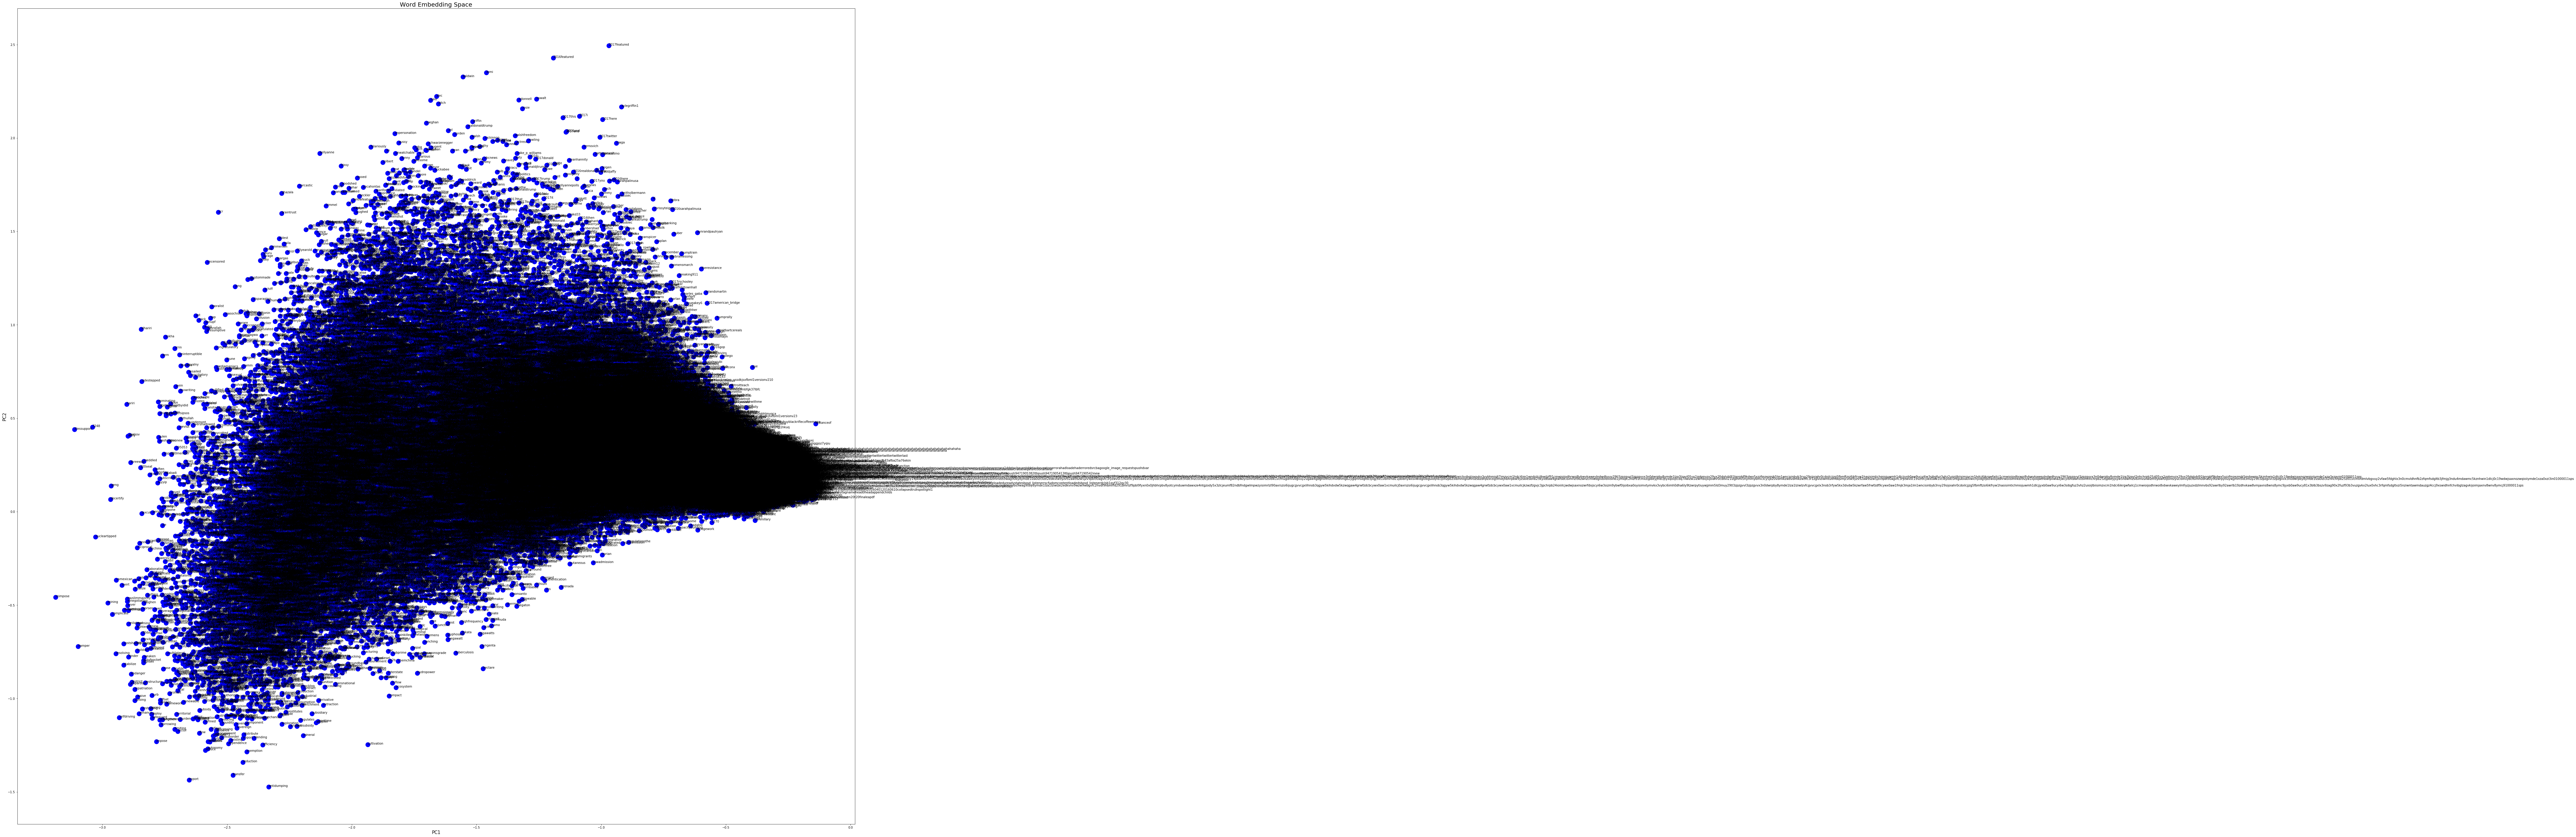

In [94]:
plt.figure(figsize=(50,50))
plt.scatter(new_X[:,0],new_X[:,1],linewidths=10,color='blue')
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)
vocab=list(model.wv.vocab)
for i, word in enumerate(vocab):
    plt.annotate(word,xy=(new_X[i,0],new_X[i,1]))

